### 1. Carregando Bibliotecas

In [2]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf
from keras.callbacks import ModelCheckpoint

2023-01-25 17:50:34.304115: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-25 17:50:34.413827: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 17:50:34.413843: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-25 17:50:35.081160: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Inicializa o Google Drive. É necessário entrar com as credenciais do Gmail

### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


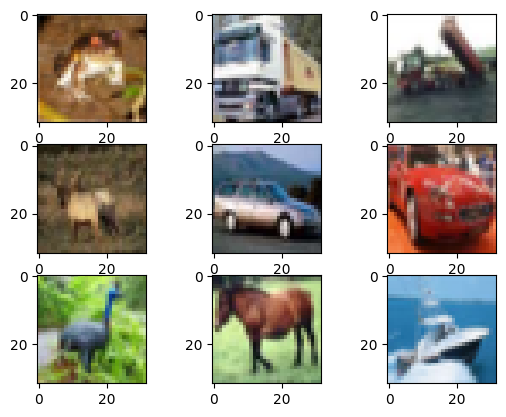

In [4]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos

In [6]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
num_classes

10

In [9]:
x_train.shape

(50000, 32, 32, 3)

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [10]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [11]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [12]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [13]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!) - Dicas

*   Tente utilizar 2-4 camadas convolucionais de tamanho progressivamente crescente
*   Use no máximo de 2 ou 3 camadas de "pooling" (2x2) após as camadas convolucionais
*   Use uma camada do tipo totalmente conectada de 128-512 neurônios
*   Use uma camada do tipo totalmente conectada de 64-256 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3

In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2023-01-25 17:50:52.974833: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-01-25 17:50:52.974971: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-25 17:50:52.975022: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-25 17:50:52.975080: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-25 17:50:52.975118: W tensorf

Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

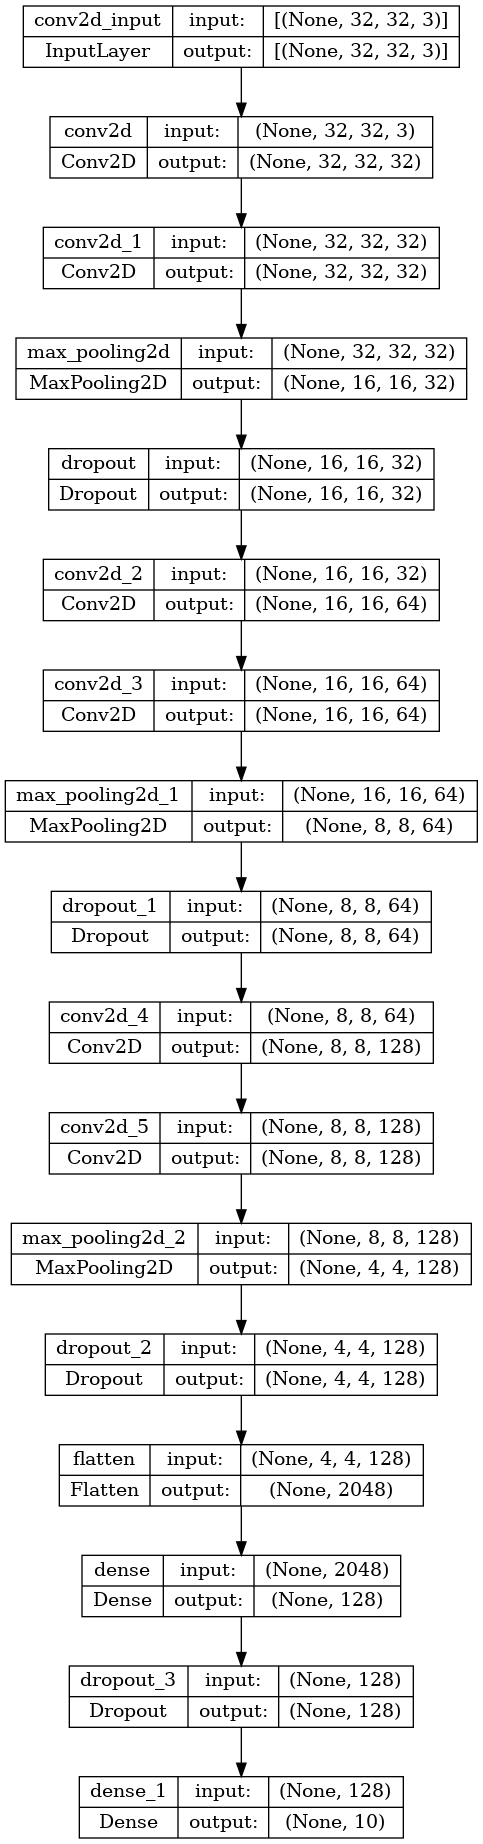

In [15]:
plot_model(model, to_file='cnn-cifar-10.png', show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

Compilando o modelo escolhendo como se dará nossa perda, otimização e métricas (parâmetros do Keras)
* mais informações em https://keras.io/losses/
* mais informações em https://keras.io/optimizers/
* mais informações em https://keras.io/metrics/

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])                  

### 7. Treinando o modelo

#O keras passa a salvar o melhor modelo pela acurácia de validação

In [17]:
checkpointer = ModelCheckpoint(filepath='./model/cifar.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
                              
hist = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/10
450/450 [==============================] - ETA: 0s - loss: 1.8471 - accuracy: 0.3094
Epoch 1: val_accuracy improved from -inf to 0.47800, saving model to ./model/cifar.hdf5
450/450 [==============================] - 73s 160ms/step - loss: 1.8471 - accuracy: 0.3094 - val_loss: 1.4474 - val_accuracy: 0.4780
Epoch 2/10
450/450 [==============================] - ETA: 0s - loss: 1.4001 - accuracy: 0.4873
Epoch 2: val_accuracy improved from 0.47800 to 0.57600, saving model to ./model/cifar.hdf5
450/450 [==============================] - 74s 164ms/step - loss: 1.4001 - accuracy: 0.4873 - val_loss: 1.1887 - val_accuracy: 0.5760
Epoch 3/10
450/450 [==============================] - ETA: 0s - loss: 1.2069 - accuracy: 0.5671
Epoch 3: val_accuracy improved from 0.57600 to 0.65600, saving model to ./model/cifar.hdf5
450/450 [==============================] - 75s 167ms/step - loss: 1.2069 - accuracy: 0.5671 - val_loss: 0.9945 - val_accuracy: 0.6560
Epoch 4/10
450/450 [====================

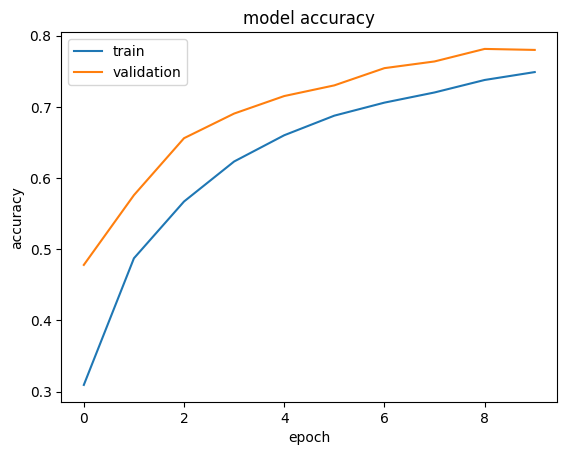

In [18]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [19]:
model = load_model("./model/cifar.hdf5")

### 8. Cálculo da precisão de classificação no dataset de testes

Avaliar e imprimir a precisão do teste

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7627000212669373


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [21]:
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [22]:
y_hat = model.predict(x_test)

313/313 [==============================] - 4s 11ms/step


In [23]:
y_hat

array([[5.9672137e-05, 1.1734491e-04, 1.0878557e-03, ..., 1.4470257e-03,
        1.7707875e-04, 1.9999893e-04],
       [8.5825397e-04, 2.2218760e-02, 1.4060630e-07, ..., 1.9004611e-09,
        9.7563565e-01, 1.2868508e-03],
       [3.2182813e-02, 9.6159596e-03, 3.0858144e-03, ..., 1.6393224e-04,
        9.2934418e-01, 2.1466751e-02],
       ...,
       [5.7310718e-08, 5.1301883e-09, 4.1384512e-04, ..., 1.4182194e-03,
        1.7737177e-08, 2.7580345e-08],
       [1.7341536e-01, 6.3826466e-01, 4.0111046e-02, ..., 3.0191524e-03,
        5.4264804e-03, 4.7795285e-02],
       [9.9620703e-09, 3.8808415e-11, 1.0691330e-06, ..., 9.9618256e-01,
        3.3993565e-12, 5.1550397e-10]], dtype=float32)

In [24]:
y_hat[100,:]

array([3.6611990e-03, 5.8072084e-05, 4.5248605e-02, 2.5654217e-02,
       4.9583709e-01, 5.6302715e-02, 1.3999993e-03, 3.7100285e-01,
       3.5117639e-04, 4.8397353e-04], dtype=float32)

In [25]:
np.argmax(y_hat[100,:])

4

In [26]:
y_test[100,:]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
np.argmax(y_test[100,:])

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

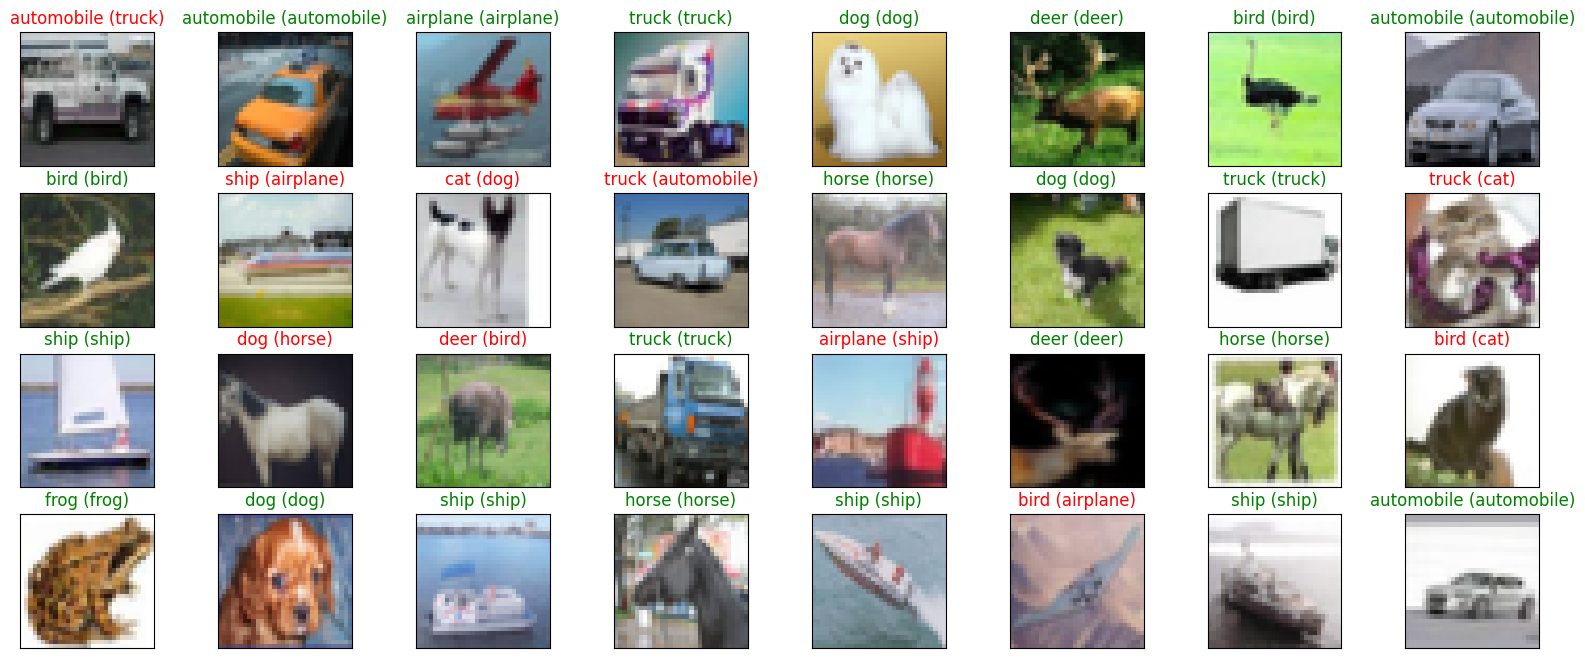

In [28]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))